In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
from cycler import cycler

In [11]:
folder = "log/evaluate_inputs/"
folder = "log/VAE/"
folder = "log/latent_class/"
files = [f for f in os.listdir(folder) if f.endswith(".csv") and "nlf240" in f]
files = sorted(files)
data = []
for file in files:
    print(file)
    data.append(np.genfromtxt(folder+file, delimiter=',',names = True))
print(len(data))

train_test_ConvAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf2402021-05-14_175028.csv
train_test_ConvVAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf2402021-05-16_222741.csv
train_test_DenseAEL1_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf2402021-05-14_170409.csv
train_test_DenseAEL1_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf2402021-05-14_170946.csv
train_test_DenseAEL1_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf2402021-05-14_172625.csv
train_test_DenseAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf2402021-05-14_165538Sigmoid.csv
train_test_DenseAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf2402021-05-14_170036.csv
train_test_DenseVAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf2402021-05-16_221813.csv
train_test_DenseVAE_bs256_do0_seq128_imu_no_orient+torques_phase2_nlf2402021-05-16_222634.csv
9


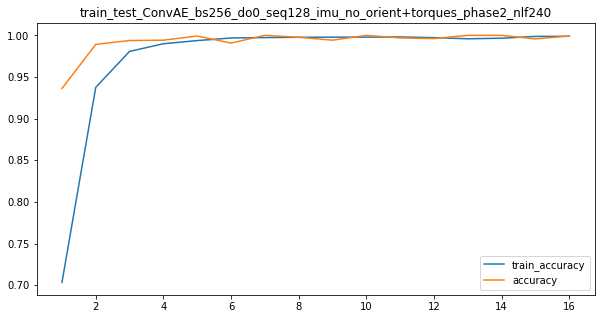

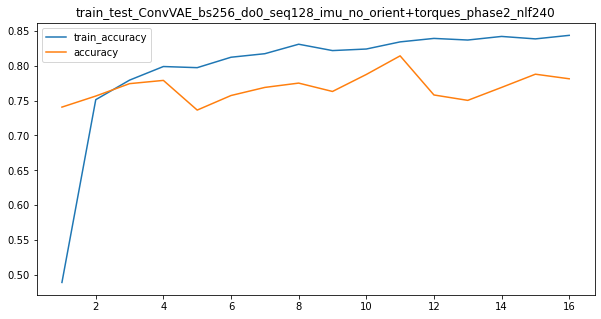

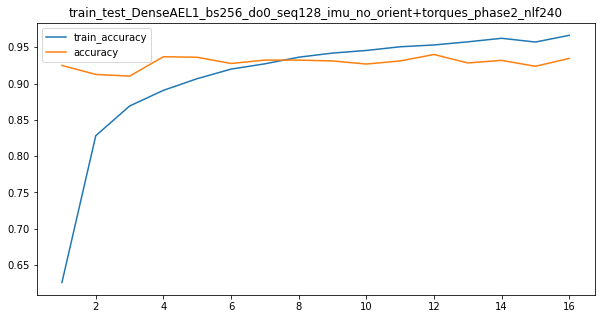

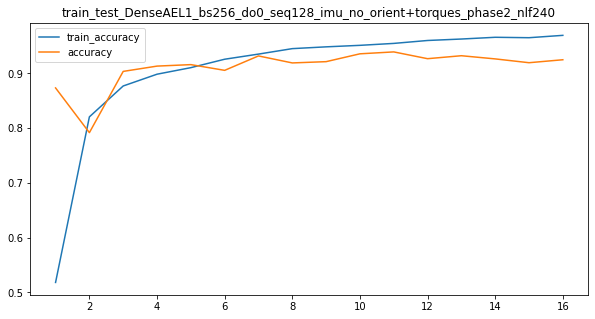

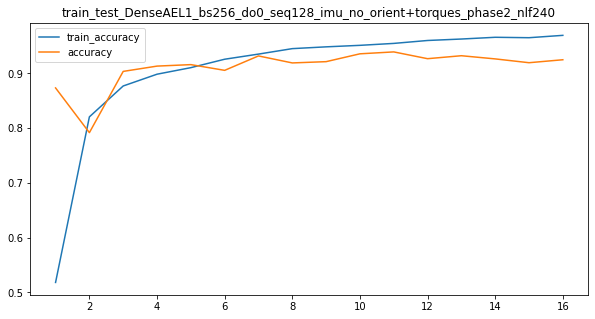

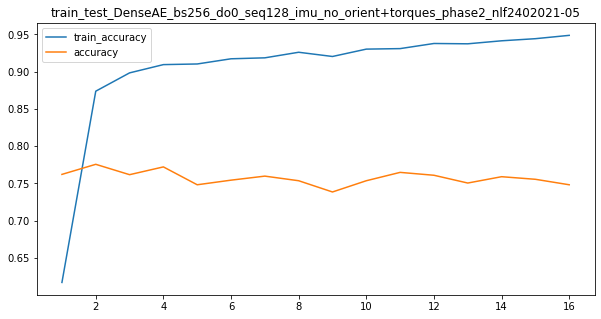

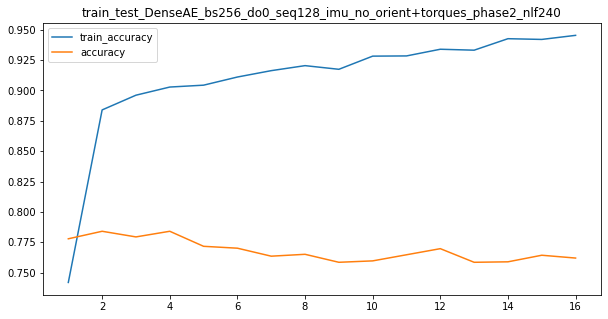

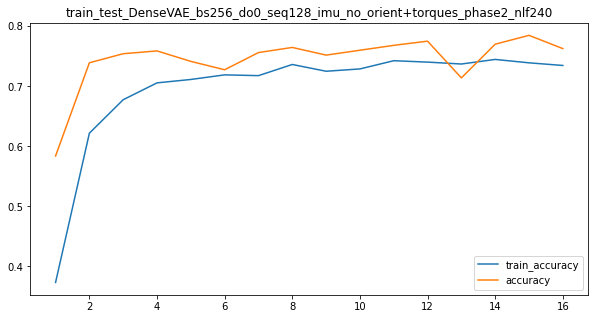

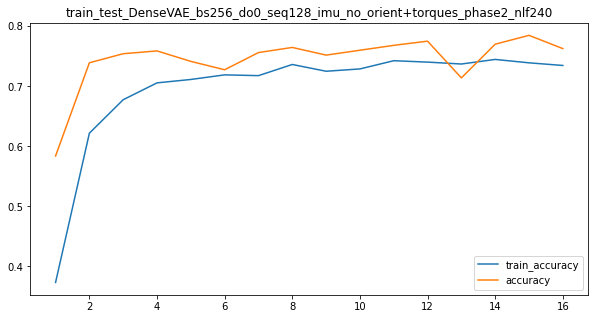

In [9]:
interest = "accuracy"
for idx, d in enumerate(data):
    fig = plt.figure(idx,figsize = [10,5])
    labels = [l for l in d.dtype.names if interest in l]
    for c in reversed(labels):
        plt.plot(d['epoch'][:], d[c][:], label = c)
    plt.legend()
    plt.title(files[idx][:-21])

In [14]:
interest = "accuracy"
best_vals = []
best_trains = []
for idx, d in enumerate(data):
    labels = [l for l in d.dtype.names if interest in l]
    for c in reversed(labels):
        if interest == "loss":
            print(files[idx][:-21], c, np.argmin(d[c]), np.min(d[c]), d[c][-1])        
        elif interest == "accuracy":
            print(files[idx][:-21], c, np.argmax(d[c]), np.max(d[c]), d[c][-1])
            if "train" in c:
                best_trains.append(np.max(d[c]))
            else:
                best_vals.append(np.max(d[c]))
print("train mean: ", np.mean(best_trains), " std: ", np.std(best_trains))
print("val mean: ", np.mean(best_vals), " std: ", np.std(best_vals))


train_test_TCN_bs256_seed12_do25_seq128_imu_no_orient_norm_derivative_phase train_accuracy 38 0.9995700034399725 0.9970760233918129
train_test_TCN_bs256_seed12_do25_seq128_imu_no_orient_norm_derivative_phase accuracy 32 0.9566563467492261 0.9465944272445821
train_test_TCN_bs256_seed1_do25_seq128_imu_no_orient_norm_derivative+torque_phase train_accuracy 24 1.0 1.0
train_test_TCN_bs256_seed1_do25_seq128_imu_no_orient_norm_derivative+torque_phase accuracy 27 0.9891640866873065 0.9791021671826625
train_test_TCN_bs256_seed1_do25_seq128_imu_no_orient_norm_derivative_phase train_accuracy 31 0.9997420020639834 0.999484004127967
train_test_TCN_bs256_seed1_do25_seq128_imu_no_orient_norm_derivative_phase accuracy 29 0.9558823529411765 0.9311145510835913
train_test_TCN_bs256_seed23_do25_seq128_imu_no_orient_norm_derivative_phase train_accuracy 37 0.999828001375989 0.9933780529755762
train_test_TCN_bs256_seed23_do25_seq128_imu_no_orient_norm_derivative_phase accuracy 15 0.9651702786377709 0.9496904

In [15]:
matches = ["seq50_", "seq250_", "seq500_"]
for idx, d in enumerate(data):
    if any(x in files[idx] for x in matches):
        if "True" in files[idx]:
            plt.figure("Air", figsize = [10,5])
            plt.plot(d['epoch'], d['accuracy'], label = files[idx][11:-28])
            plt.legend()
            plt.ylabel("Test Accuracy")
            plt.xlabel("Epochs")
            plt.title("With Air-class")
        elif "False" in files[idx]:
            plt.figure("NoAir", figsize = [10,5])
            plt.plot(d['epoch'], d['accuracy'], label = files[idx][11:-28])
            plt.legend()
            plt.ylabel("Test Accuracy")
            plt.title("Without Air-class")
            plt.xlabel("Epochs")

In [52]:
matches = ["seq50_", "seq250_", "seq500_"]
interest = "test_loss"
for idx, d in enumerate(data):
    if any(x in files[idx] for x in matches):
        if "True" in files[idx]:
            plt.figure("Air", figsize = [10,5])
            plt.plot(d['epoch'], d[interest], label = files[idx][11:-28])
            plt.legend()
            plt.ylabel(interest)
            plt.xlabel("Epochs")
            plt.title("With Air-class")
        elif "False" in files[idx]:
            plt.figure("NoAir", figsize = [10,5])
            plt.plot(d['epoch'], d[interest], label = files[idx][11:-28])
            plt.legend()
            plt.ylabel(interest)
            plt.title("Without Air-class")
            plt.xlabel("Epochs")

## Learning Curves

In [7]:
matches = ["seq25_imu"]
interest = ["train_loss","test_loss"]
#interest = ["train_accuracy","test_accuracy"]
for idx, d in enumerate(data):
    if any(x in files[idx] for x in matches):
        if "True" in files[idx]:
            plt.figure("Air", figsize = [10,5])
            plt.plot(d['epoch'], d[interest[0]], label = interest[0], linewidth=4)
            plt.plot(d['epoch'], d[interest[1]], label = interest[1],linewidth=4)
            plt.legend()
            plt.ylabel("NLL loss")
            #plt.ylabel("Accuracy")
            plt.xlabel("Epochs")
            plt.title(files[idx][11:-28]+" with air class")
        elif "False" in files[idx]:
            plt.figure("NoAir", figsize = [10,5])
            plt.plot(d['epoch'], d[interest[0]], label = interest[0], linewidth=4)
            plt.plot(d['epoch'], d[interest[1]], label = interest[1], linewidth=4)
            plt.legend()
            plt.ylabel("NLL loss")
            #plt.ylabel("Accuracy")
            plt.title(files[idx][11:-28]+" without air class")
            plt.xlabel("Epochs")

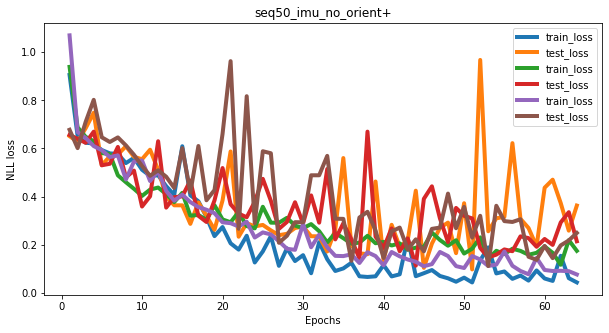

In [10]:
matches = ["seq50_imu"]
interest = ["train_loss","test_loss"]
#interest = ["train_accuracy","test_accuracy"]
for idx, d in enumerate(data):
    if any(x in files[idx] for x in matches):
        plt.figure("Some", figsize = [10,5])
        plt.plot(d['epoch'], d[interest[0]], label = interest[0], linewidth=4)
        plt.plot(d['epoch'], d[interest[1]], label = interest[1],linewidth=4)
        plt.legend()
        plt.ylabel("NLL loss")
        #plt.ylabel("Accuracy")
        plt.xlabel("Epochs")
        plt.title(files[idx][11:-28])

## Evaluate diff phases

In [11]:
matches = ["do25"]
interest = ["train_loss","test_loss"]
#interest = ["train_accuracy","test_accuracy"]
for idx, d in enumerate(data):
    if any(x in files[idx] for x in matches):
        plt.figure("Some", figsize = [10,5])
        plt.plot(d['epoch'], d[interest[0]], label = interest[0], linewidth=4)
        plt.plot(d['epoch'], d[interest[1]], label = interest[1],linewidth=4)
        plt.legend()
        plt.ylabel("NLL loss")
        #plt.ylabel("Accuracy")
        plt.xlabel("Epochs")
        plt.title(files[idx][11:-28])

'None'

## Load Model for condusion matrix

In [14]:
import torch
import sys
sys.path.append("../../")
from TCN.soil_classification.model import TCN
from TCN.soil_classification.utils import data_generator
channel_sizes = [30]*8
kernel_size = 7;
path = "/home/mads/git/TCN/TCN/soil_classification/models_3/seq100_imu_no_orient+torques/seq100_imu_no_orient+torques_ep64.pt"
model = TCN(10, 4, channel_sizes, kernel_size=kernel_size, dropout=0.25)
model.load_state_dict(torch.load(path))
model.eval()

TCN(
  (tcn): TemporalConvNet(
    (network): Sequential(
      (0): TemporalBlock(
        (conv1): Conv1d(10, 30, kernel_size=(7,), stride=(1,), padding=(6,))
        (chomp1): Chomp1d()
        (relu1): ReLU()
        (dropout1): Dropout(p=0.25, inplace=False)
        (conv2): Conv1d(30, 30, kernel_size=(7,), stride=(1,), padding=(6,))
        (chomp2): Chomp1d()
        (relu2): ReLU()
        (dropout2): Dropout(p=0.25, inplace=False)
        (net): Sequential(
          (0): Conv1d(10, 30, kernel_size=(7,), stride=(1,), padding=(6,))
          (1): Chomp1d()
          (2): ReLU()
          (3): Dropout(p=0.25, inplace=False)
          (4): Conv1d(30, 30, kernel_size=(7,), stride=(1,), padding=(6,))
          (5): Chomp1d()
          (6): ReLU()
          (7): Dropout(p=0.25, inplace=False)
        )
        (downsample): Conv1d(10, 30, kernel_size=(1,), stride=(1,))
        (relu): ReLU()
      )
      (1): TemporalBlock(
        (conv1): Conv1d(30, 30, kernel_size=(7,), stride=(

In [15]:
train_folder = "/home/mads/git/TCN/TCN/soil_classification/data/exp_1604/train"
test_folder = "/home/mads/git/TCN/TCN/soil_classification/data/exp_1604/test"
X_train, Y_train = data_generator(train_folder, 100, 90, phase =2, val_mask=val_mask, rng=rng)
X_test, Y_test = data_generator(test_folder, 100, 90, phase=2, val_mask=val_mask, rng=rng)

mins, _ = torch.min(torch.min(X_train,1)[0],0)
maxs, _ = torch.max(torch.max(X_train,1)[0],0)
X_train, X_test = (X_train-mins)/(maxs-mins), (X_test-mins)/(maxs-mins)
X_train, X_test = X_train.permute(0,2,1), X_test.permute(0,2,1)

NameError: name 'seq_len' is not defined